# Gini dataset
from : https://data.worldbank.org/indicator/SI.POV.GINI?end=2021&most_recent_value_desc=true&start=2021&view=map

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import utils
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.10f' % x)

In [2]:
df = utils.load_gini()

In [3]:
melted_df = df.melt(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],var_name="year", value_name='gini')
melted_df

,Country Name,Country Code,Indicator Name,Indicator Code,year,gini
0,Aruba,ABW,Gini index,SI.POV.GINI,1960,NaN
1,Africa Eastern and Southern,AFE,Gini index,SI.POV.GINI,1960,NaN
2,Afghanistan,AFG,Gini index,SI.POV.GINI,1960,NaN
3,Africa Western and Central,AFW,Gini index,SI.POV.GINI,1960,NaN
4,Angola,AGO,Gini index,SI.POV.GINI,1960,NaN
...,...,...,...,...,...,...
16753,Kosovo,XKX,Gini index,SI.POV.GINI,Unnamed: 66,NaN
16754,"Yemen, Rep.",YEM,Gini index,SI.POV.GINI,Unnamed: 66,NaN
16755,South Africa,ZAF,Gini index,SI.POV.GINI,Unnamed: 66,NaN
16756,Zambia,ZMB,Gini index,SI.POV.GINI,Unnamed: 66,NaN


In [4]:
# drop na gini fields
print(f"pre {melted_df.shape}")
melted_df = melted_df[melted_df['gini'].notna()]
print(f"after {melted_df.shape}")

pre (16758, 6)
after (1838, 6)


In [5]:
# check years with a lot of data
melted_df.groupby('year').count()['Country Name'].sort_index(ascending=False)
# looks good for the past 10 years

year
2021     1
2020    20
2019    60
2018    85
2017    77
2016    83
2015    85
2014    83
2013    77
2012    85
2011    78
2010    84
2009    78
2008    74
2007    70
2006    76
2005    75
2004    70
2003    59
2002    53
2001    35
2000    49
1999    32
1998    37
1997    28
1996    31
1995    36
1994    26
1993    22
1992    31
1991    19
1990    17
1989    13
1988     9
1987    20
1986    14
1985    11
1984     5
1983     4
1982     2
1981     7
1980     3
1979     5
1978     1
1977     1
1975     2
1974     2
1971     1
1969     1
1967     1
Name: Country Name, dtype: int64

## Example gini development for sweden

<AxesSubplot: xlabel='year'>

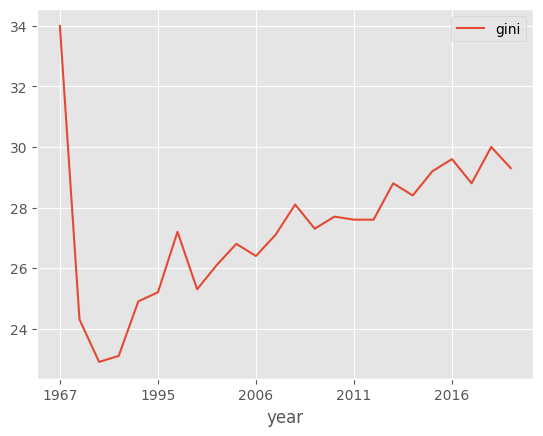

In [6]:
melted_df[melted_df['Country Name'] == "Sweden"].sort_values(by="year").plot.line(x='year', y='gini')
# melted_df

In [12]:
melted_df.year = melted_df.year.astype(int)
melted_df = melted_df[melted_df.year.between(2005,2015)]
melted_df

/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/303493610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_df.year = melted_df.year.astype(int)


,Country Name,Country Code,Indicator Name,Indicator Code,year,gini
11975,Albania,ALB,Gini index,SI.POV.GINI,2005,30.6000000000
11979,Argentina,ARG,Gini index,SI.POV.GINI,2005,47.7000000000
11980,Armenia,ARM,Gini index,SI.POV.GINI,2005,36.0000000000
11984,Austria,AUT,Gini index,SI.POV.GINI,2005,28.7000000000
11985,Azerbaijan,AZE,Gini index,SI.POV.GINI,2005,26.6000000000
...,...,...,...,...,...,...
14878,Ukraine,UKR,Gini index,SI.POV.GINI,2015,25.5000000000
14880,Uruguay,URY,Gini index,SI.POV.GINI,2015,40.1000000000
14881,United States,USA,Gini index,SI.POV.GINI,2015,41.2000000000
14891,Kosovo,XKX,Gini index,SI.POV.GINI,2015,26.5000000000


<AxesSubplot: xlabel='year', ylabel='gini'>

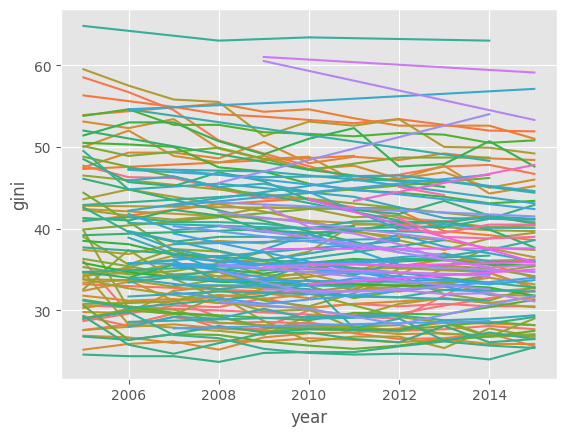

In [16]:

sns.lineplot(data=melted_df, x='year',y='gini', hue='Country Name', legend=False)

[ 3.07909605e-01 -5.87744633e+02]
[6.86225758e-03 1.38000000e+01]
[1.06324701e-02 2.13500000e+01]
[-7.52727273e-01  1.55648545e+03]
[-9.45454545e-02  2.20727273e+02]
[-1.53571429e-01  3.43614286e+02]
[ 1.15454545e-01 -2.01681818e+02]
[6.63341646e-03 1.33000000e+01]
[-2.200e-01  4.743e+02]
[-2.40909091e-01  5.11745455e+02]
[-1.34545455e-01  2.98718182e+02]
[ 1.1000e+00 -2.1687e+03]
[ 1.4000e-01 -2.4288e+02]
[-1.15272727e+00  2.36743182e+03]
[-2.5000e-02  8.3275e+01]
[-1.2000e+00  2.4713e+03]
[-4.09090909e-01  8.76012727e+02]
[ 3.35757576e-01 -6.39260606e+02]
[-9.0000e-01  1.8479e+03]
[ 7.42857143e-01 -1.45677143e+03]
[-6.0000e-01  1.2514e+03]
[ 5.42857143e-01 -1.04671429e+03]
[-3.03501946e-02  9.46595331e+01]
[1.39940239e-02 2.81000000e+01]
[1.07657882e-02 2.16500000e+01]
[-3.11475410e-01  6.72414754e+02]
[-3.22368421e-01  6.89495395e+02]
[-3.28631285e-01  7.14182263e+02]
[1.12462761e-02 2.26500000e+01]
[1.04622266e-02 2.10500000e+01]
[ 2.66666667e-01 -4.87366667e+02]
[-7.27272727e-03  

/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/2575731798.py:8: RankWarning: Polyfit may be poorly conditioned
  return trendline(df.year.values, df.gini.values)
/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/2575731798.py:8: RankWarning: Polyfit may be poorly conditioned
  return trendline(df.year.values, df.gini.values)
/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/2575731798.py:8: RankWarning: Polyfit may be poorly conditioned
  return trendline(df.year.values, df.gini.values)
/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/2575731798.py:8: RankWarning: Polyfit may be poorly conditioned
  return trendline(df.year.values, df.gini.values)
/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/2575731798.py:8: RankWarning: Polyfit may be poorly conditioned
  return trendline(df.year.values, df.gini.values)
/var/folders/v4/5kdk6t_57x3gwhsz8x8jl_900000gn/T/ipykernel_1077/2575731798.py:8: RankWarning: Polyfit may

<AxesSubplot: ylabel='Country Name'>

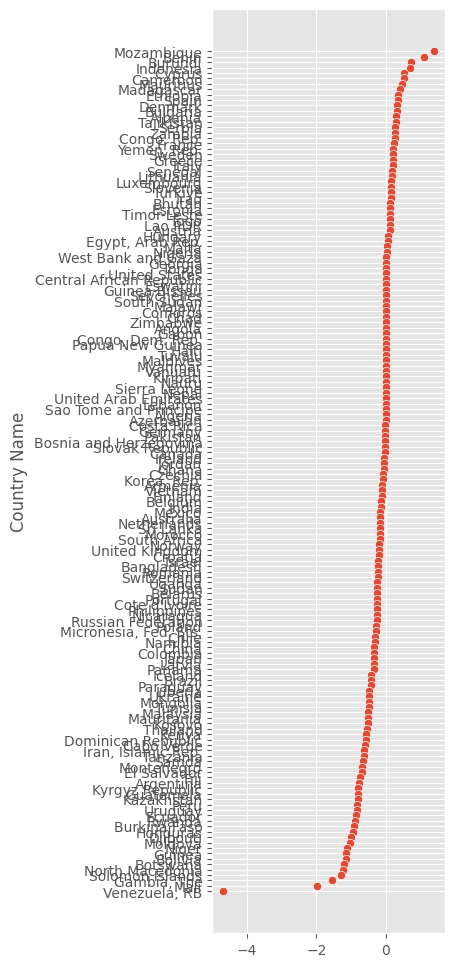

In [19]:
# gini trends
def trendline(x, y, order=1):
    slope = np.polyfit(x, y, order)[-2]
    print(np.polyfit(x, y, order))
    return float(slope)

def apply_trendline(df):
    return trendline(df.year.values, df.gini.values)

trends = melted_df.groupby('Country Name').apply(apply_trendline).sort_values()[::-1]
# sns.scatterplot(trends_per_country, y='country')
fig, ax = plt.subplots(figsize=(3,12))
sns.scatterplot(x=trends.values, y=trends.keys(), ax=ax)